### Social Network Ads data has 4 variables: UserID, Gender, Age, Estimated Salary as features and Purchase being the target variable - A typical classification problem with two classes - whether Ads were purchased(1) or not(0).

### We are going to use SVM for this dataset.

In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import math as m
import xlrd
from scipy import stats
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# set work directory
path = os.getcwd()

In [3]:
# get the data sets
idata  = pd.read_excel(str(path) + '/svm_useCase.xlsx')

In [4]:
itrain = idata.drop('User ID', axis = 1)

In [5]:
itrain['Gender'] = itrain['Gender'].replace({'Male': 1, 'Female': 0})

In [6]:
itrain.apply(lambda x:(len(x.unique()), [x.unique()]))

Gender                                                 (2, [[1, 0]])
Age                (43, [[19, 35, 26, 27, 32, 25, 20, 18, 29, 47,...
EstimatedSalary    (117, [[19000, 20000, 43000, 57000, 76000, 580...
Purchased                                              (2, [[0, 1]])
dtype: object

In [7]:
itrain.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff00bc34d68>,
      dtype=object)

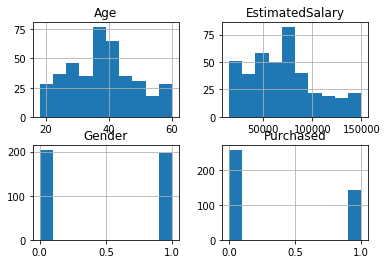

In [8]:
itrain.hist()

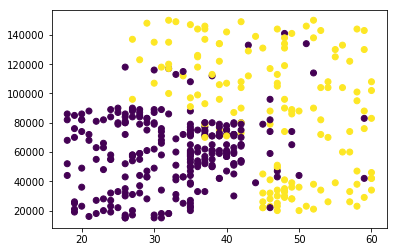

In [9]:
plt.scatter(x = 'Age', y = 'EstimatedSalary', c = 'Purchased', data = itrain)

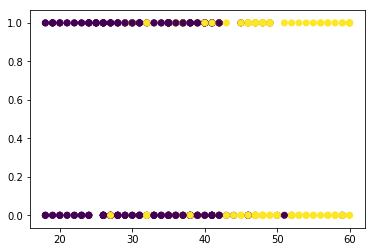

In [24]:
plt.scatter(x = 'Age', y = 'Gender', c = 'Purchased', data = itrain)

Text(0.5,0,'Purchased(1)/not(0)')

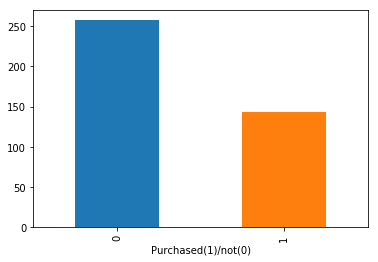

In [10]:
cx = itrain['Purchased'].value_counts().plot.bar()
cx.set_xlabel('Purchased(1)/not(0)')

Text(0.5,0,'Gender')

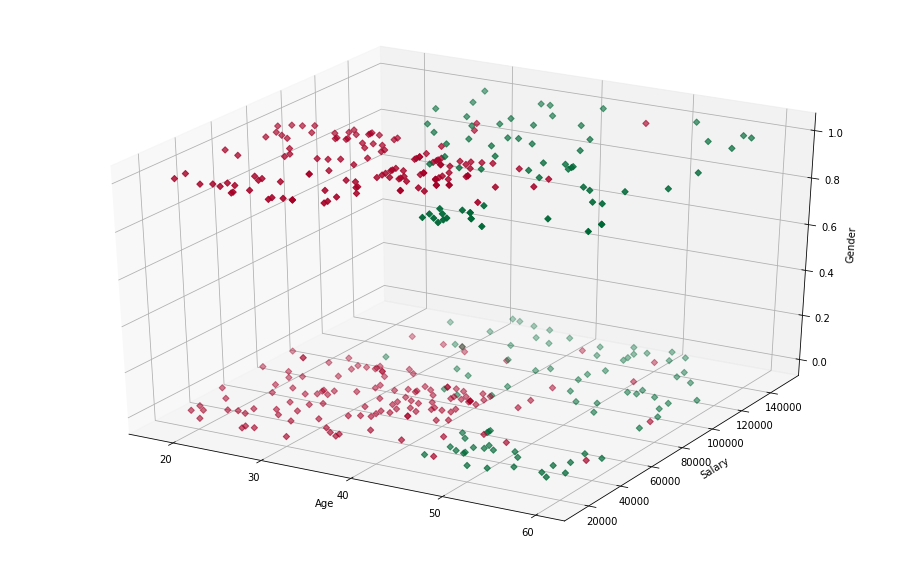

In [11]:
itrain = itrain.astype(int)
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (16,10))
ax = plt.axes(projection='3d')
ax.scatter3D(itrain['Age'], itrain['EstimatedSalary'], itrain['Gender'], c = itrain['Purchased'], cmap='RdYlGn', marker='D')
ax.set_xlabel('Age')
ax.set_ylabel('Salary')
ax.set_zlabel('Gender')

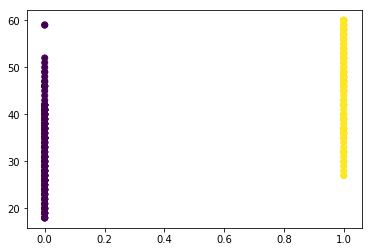

In [12]:
plt.scatter(x = 'Purchased', y = 'Age', c = 'Purchased', data = itrain)

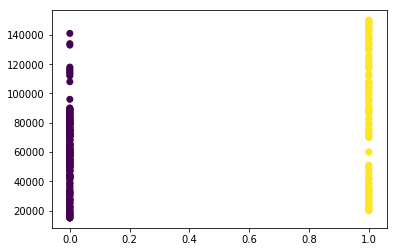

In [13]:
plt.scatter(x = 'Purchased', y = 'EstimatedSalary', c = 'Purchased', data = itrain)

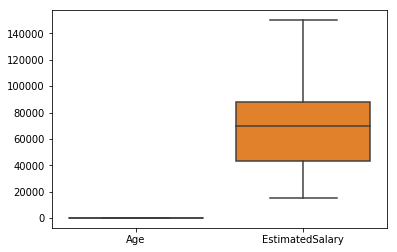

In [14]:
sns.boxplot(data = itrain[['Age', 'EstimatedSalary']])

In [15]:
predictors = itrain.drop('Purchased', axis = 1)
target = itrain['Purchased']

In [16]:
#importing packages from sk learn
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE


#FUNCTION for Train & Validation set
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, 
                                                    random_state = 7)

In [17]:
#Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test)

In [28]:
X_train.head()

,Gender,Age,EstimatedSalary
270,0,43,133000
98,1,35,73000
81,1,39,42000
50,0,24,32000
244,0,41,72000


In [26]:
X_train1

array([[-0.96922337,  0.5118008 ,  1.80675605],
       [ 1.03175391, -0.24032896,  0.09003827],
       [ 1.03175391,  0.13573592, -0.79693258],
       [-0.96922337, -1.27450738, -1.08305221],
       [-0.96922337,  0.32376836,  0.06142631],
       [ 1.03175391,  0.22975214,  0.03281435],
       [-0.96922337,  0.32376836, -1.14027614],
       [-0.96922337,  1.07589811, -0.88276847],
       [-0.96922337, -0.24032896, -1.34055988],
       [-0.96922337,  0.41778458,  0.57644164],
       [ 1.03175391, -1.74458847,  0.43338183],
       [ 1.03175391,  0.41778458, -0.45358903],
       [-0.96922337,  0.69983323,  1.74953213],
       [-0.96922337,  1.54597921, -1.25472399],
       [-0.96922337, -0.33434518,  0.06142631],
       [ 1.03175391,  0.32376836,  0.26171005],
       [ 1.03175391, -1.27450738, -1.45500773],
       [ 1.03175391, -0.05229652,  0.26171005],
       [-0.96922337, -1.83860469,  0.46199379],
       [ 1.03175391, -0.8984425 , -0.31052921],
       [-0.96922337,  0.60581701,  1.978

In [18]:
# training a SVM classifier and Predicting 

from sklearn.svm import SVC # "Support vector classifier"
SVmodel = SVC(class_weight = 'balanced')

from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'poly', 'rbf'), 'C':[0.01, 10, 100]}

gs = GridSearchCV(SVmodel, parameters)

gs.fit(X_train1, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'poly', 'rbf'), 'C': [0.01, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
predictions = gs.predict(X_test1)

In [20]:
gs.best_params_

{'C': 10, 'kernel': 'rbf'}

In [21]:
#metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

# accuracy on X_test
accuracy = gs.score(X_test1, y_test)
print('acc in %', accuracy)
 
# creating a confusion matrix
NbCM = pd.crosstab(y_test, predictions)
NbCM

             precision    recall  f1-score   support

          0       1.00      0.93      0.96        54
          1       0.87      1.00      0.93        26

avg / total       0.96      0.95      0.95        80

acc in % 0.95


col_0,0,1
Purchased,,
0,50,4
1,0,26


In [22]:
Xtr= X_train[['Age', 'EstimatedSalary']]
X = sc.fit_transform(Xtr)
Y = y_train

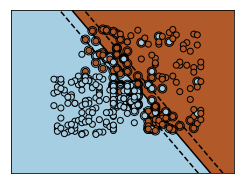

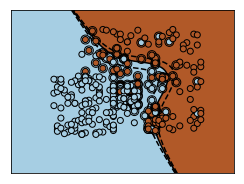

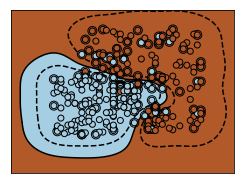

In [23]:
# figure number
fignum = 1

for kernel in ('linear', 'poly', 'rbf'):
    clf = SVC(kernel=kernel, gamma=2)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()